# Exploratory Data Analysis of CDP dataset 


Se the documentation of the dataset [here](https://github.com/OpenGeoScales/ogs-data-exploration/blob/main/data/ghg-emissions/cdp/README.md) for more details on the data source and methods of calculations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_18 = pd.read_csv("C:/Users/flore/ogs_data_exploration/ogs-data-exploration/data/ghg-emissions/cdp/2018_-_2019_City-wide_Emissions.csv")
data_19 = pd.read_csv("C:/Users/flore/ogs_data_exploration/ogs-data-exploration/data/ghg-emissions/cdp/2019_City-wide_Emissions.csv")
data_20 = pd.read_csv("C:/Users/flore/ogs_data_exploration/ogs-data-exploration/data/ghg-emissions/cdp/2020_-_City-Wide_Emissions.csv")

In [28]:
data_18.columns

Index(['Year Reported to CDP', 'Account Number', 'Organization', 'City',
       'Country', 'CDP Region', 'Reporting Authority', 'Access',
       'City-wide Emissions Inventory', 'Accounting Year',
       'Inventory Boundary', 'Primary Protocol', 'Primary Protocol Comment',
       'Common Reporting Framework inventory format (GPC) ', 'Gases Included',
       'Direct emissions/ Scope 1 (metric tonnes CO2e) for Total generation of grid supplied energy ',
       'Direct emissions/ Scope 1 (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy) ',
       'Indirect emissions from use of grid supplied energy/Scope 2 (metric tonnes CO2e) for Total generation of grid supplied energy',
       'Indirect emissions from use of grid supplied energy/Scope 2 (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)',
       'Emissions occurring outside city boundary/ Scope 3 (metric tonnes CO2e) for Total generation of grid supplied energy 

In [29]:
# create missing columns
data_18.insert( 10, "Administrative city boundary", "")
data_19.insert( 10, "Administrative city boundary", "")

data_20.insert(6, "Reporting Authority", "")

In [30]:
# check that columns are the same in all 3 dataframes
pd.DataFrame({"data_18": data_18.columns,
            "data_19": data_19.columns,
            "data_20": data_20.columns})

,data_18,data_19,data_20
0,Year Reported to CDP,Year Reported to CDP,Year Reported to CDP
1,Account Number,Account Number,Account Number
2,Organization,Organization,Organization
3,City,City,City
4,Country,Country,Country
5,CDP Region,CDP Region,CDP Region
6,Reporting Authority,Reporting Authority,Reporting Authority
7,Access,Access,Access
8,City-wide Emissions Inventory,City-wide Emissions Inventory,City-wide emissions inventory
9,Accounting Year,Accounting Year,Accounting year


In [33]:
print(f"number of records in 2018 : {data_18.shape[0]}")
print(f"number of records in 2019 : {data_19.shape[0]}")
print(f"number of records in 2020 : {data_20.shape[0]}")

number of records in 2018 : 1302
number of records in 2019 : 814
number of records in 2020 : 776


In [55]:
# we concatenate the dataframes and drop duplicates
data_18.columns = data_20.columns
data_19.columns = data_20.columns

data = pd.concat([data_18, data_19, data_20], ignore_index = False)
data = data.drop_duplicates()
data.reset_index(inplace = True)

In [59]:
data.tail()

,index,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,City-wide emissions inventory,...,TOTAL Scope 3 Emissions,TOTAL BASIC Emissions (GPC),TOTAL BASIC+ Emissions (GPC),Change in emissions,Primary reason for the change in emissions,Land area (in square km),Population,Population Year,City Location,Last update
2191,771,2020,35885,Tel Aviv-Yafo Municipality,Tel Aviv-Yafo,Israel,Middle East,,public,Yes,...,NaN,NaN,NaN,Increased,Population increase,52.00,443940.0,2017,POINT (34.7823 32.0816),2021-04-10T02:18:55.717
2192,772,2020,73754,Panaji,NaN,India,South and West Asia,,public,Yes,...,NaN,NaN,NaN,Do not know,"Other, please specify",8.12,40019.0,2011,NaN,2021-04-10T02:18:55.717
2193,773,2020,839667,Municipio de Guanagazapa,NaN,Guatemala,Latin America,,public,Yes,...,NaN,NaN,NaN,Do not know,"Other, please specify",220.00,20083.0,2019,NaN,2021-04-10T02:18:55.717
2194,774,2020,849122,Puerto Madryn,NaN,Argentina,Latin America,,public,Yes,...,NaN,NaN,NaN,This is our first year of calculation,"Other, please specify",330.00,108780.0,2018,NaN,2021-04-10T02:18:55.717
2195,775,2020,845309,Puente Piedra,NaN,Peru,Latin America,,public,Intending to undertake in the next 2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-10T02:18:55.717


In [48]:
print(d.drop_duplicates().shape,
d.shape)

(2196, 34) (2892, 34)


In [16]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has 776 rows and 33 columns


In [13]:
data.head()

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Access,City-wide emissions inventory,Accounting year,Administrative city boundary,...,TOTAL Scope 3 Emissions,TOTAL BASIC Emissions (GPC),TOTAL BASIC+ Emissions (GPC),Change in emissions,Primary reason for the change in emissions,Land area (in square km),Population,Population Year,City Location,Last update
0,2020,834289,Municipality of Rauch,NaN,Argentina,Latin America,public,Yes,2014-01-01 - 2014-12-31,City / Municipality,...,NaN,NaN,NaN,This is our first year of calculation,"Other, please specify: No hay datos",4316.45,15520.0,2014,NaN,2021-04-10T02:18:55.717
1,2020,50671,Município de Fafe,Fafe,Portugal,Europe,public,Not intending to undertake,NaN,City / Municipality,...,NaN,NaN,NaN,NaN,NaN,219.08,50633.0,2011,POINT (-8.17286 41.4508),2021-04-10T02:18:55.717
2,2020,55334,Município de Braga,Braga,Portugal,Europe,public,Yes,2019-01-01 - 2019-12-31,City / Municipality,...,NaN,NaN,NaN,Increased,Change in data collection methods,184.00,189331.0,2020,POINT (-8.43821 41.5337),2021-04-10T02:18:55.717
3,2020,10894,City of Los Angeles,Los Angeles,United States of America,North America,public,Yes,2018-01-01 - 2018-12-31,City / Municipality,...,NaN,NaN,NaN,Increased,"Other, please specify: Expanded reporting from...",1215.00,4021488.0,2018,POINT (-118.244 34.0522),2021-04-10T02:18:55.717
4,2020,840269,"Town of Whitby, ON",NaN,Canada,North America,public,Yes,2017-01-01 - 2017-12-31,City / Municipality,...,NaN,NaN,NaN,This is our first year of calculation,"Other, please specify",146.53,136235.0,2018,NaN,2021-04-10T02:18:55.717


## Spacial coverage

Summary of the analysis below:
- 84 countries from all continents, the most represented are North/South America and Europe
- there is one record per city (except Santiago whi has 2)
- 30% of cities are missing but in most cases we should be able to infer the city name from 'Organization'
- Can we merge easily this dataset with other sources ? We have clean names of country/city so I guess it is ok if we link them with city/country codes

In [90]:
# Keeping only geo-related data so it's easier to display
geo_data = data.loc[:, ['Account Number', 'Organization', 'City', 'Country', 'CDP Region', 'Access',
                        'City-wide emissions inventory', 'Administrative city boundary', 'Inventory boundary (compared to Administrative city boundary)',
                       'Land area (in square km)', 'City Location']]
geo_data.head()

,Account Number,Organization,City,Country,CDP Region,Access,City-wide emissions inventory,Administrative city boundary,Inventory boundary (compared to Administrative city boundary),Land area (in square km),City Location
0,834289,Municipality of Rauch,NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,4316.45,NaN
1,50671,Município de Fafe,Fafe,Portugal,Europe,public,Not intending to undertake,City / Municipality,NaN,219.08,POINT (-8.17286 41.4508)
2,55334,Município de Braga,Braga,Portugal,Europe,public,Yes,City / Municipality,Larger – covers the whole city and adjoining a...,184.00,POINT (-8.43821 41.5337)
3,10894,City of Los Angeles,Los Angeles,United States of America,North America,public,Yes,City / Municipality,Same – covers entire city and nothing else,1215.00,POINT (-118.244 34.0522)
4,840269,"Town of Whitby, ON",NaN,Canada,North America,public,Yes,City / Municipality,Larger – covers the whole city and adjoining a...,146.53,NaN


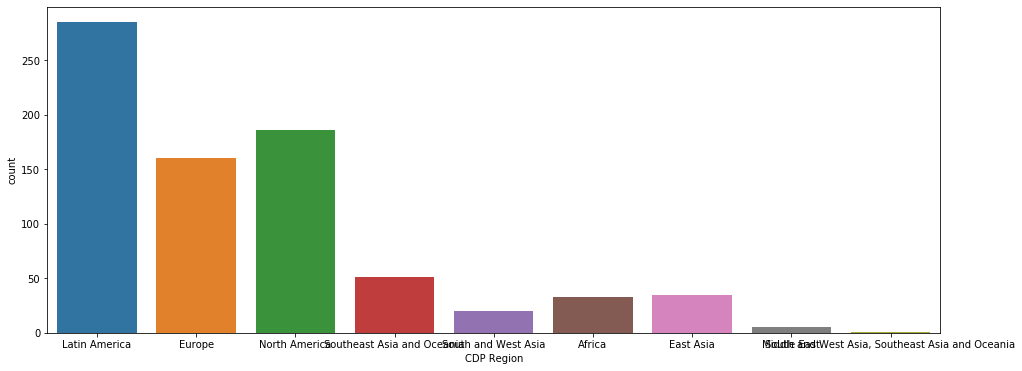

In [69]:
# Number of records (=cities) per region
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x = 'CDP Region', data = geo_data)

In [45]:
print(f"Number of countries : {geo_data.groupby(by = 'Country')['Country'].count().size} \n")

Number of countries : 84 



In [47]:
# how many records per city?
geo_data['City'].value_counts()

Santiago               2
Hong Kong              1
Miami                  1
Gdynia                 1
Presidente Prudente    1
                      ..
Somerville             1
Trelleborg             1
Middelfart             1
Lakewood               1
Brumadinho             1
Name: City, Length: 523, dtype: int64

In [46]:
# How many cities recorded per country? (null value of cities are included)
print(geo_data.groupby(by = 'Country')['Country'].count().sort_values(ascending = False)[:20])

Country
United States of America                                161
Brazil                                                   87
Argentina                                                71
Mexico                                                   36
Colombia                                                 31
United Kingdom of Great Britain and Northern Ireland     29
Canada                                                   25
Portugal                                                 23
Italy                                                    18
Australia                                                17
Peru                                                     16
India                                                    16
Costa Rica                                               15
Denmark                                                  14
Chile                                                    12
Turkey                                                   11
Sweden                          

In [94]:
# Let's see an example
geo_data[geo_data['Country']=='France']

,Account Number,Organization,City,Country,CDP Region,Access,City-wide emissions inventory,Administrative city boundary,Inventory boundary (compared to Administrative city boundary),Land area (in square km),City Location
297,74643,Dijon métropole,NaN,France,Europe,public,Yes,Intercommunality,Same – covers entire city and nothing else,240.0,NaN
534,50220,Métropole Nice Côte d'Azur,Nice,France,Europe,public,Yes,Metropolitan area,Same – covers entire city and nothing else,1400.0,POINT (7.26195 43.7102)
602,31175,City of Paris,Paris,France,Europe,public,Yes,City / Municipality,Same – covers entire city and nothing else,105.0,POINT (2.35222 48.8566)


### Can we infer city name from 'Organization' ?

In (I guess) all cases the name of the city can be extracted from Organization

The question is: does the emission measurment concerns only the city, or a breader area? 

I checked on some examples below and in many cases the area covered in the emission measurment is the city itself (when `Administrative city boundary = City / Municipality	` and `Inventory boundary = Same – covers entire city and nothing else`)

In [92]:
# Ratio of missing  values
geo_data.isna().sum() / geo_data.shape[0]

Account Number                                                   0.000000
Organization                                                     0.000000
City                                                             0.324742
Country                                                          0.000000
CDP Region                                                       0.000000
Access                                                           0.000000
City-wide emissions inventory                                    0.027062
Administrative city boundary                                     0.003866
Inventory boundary (compared to Administrative city boundary)    0.248711
Land area (in square km)                                         0.011598
City Location                                                    0.394330
dtype: float64

In [93]:
# Can we infer the name of cities from 'Organization' when 'City' is missing ?

geo_data[geo_data['City'].isna()].sample(10)

,Account Number,Organization,City,Country,CDP Region,Access,City-wide emissions inventory,Administrative city boundary,Inventory boundary (compared to Administrative city boundary),Land area (in square km),City Location
107,841269,Municipalidad de Montecarlo,NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,958.00,NaN
251,73700,Mariá Grande,NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,79.00,NaN
562,848964,Presidencia Roque Sáenz Peña,NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,1500.00,NaN
129,834251,Municipality of Coronel Dominguez,NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,50500.00,NaN
741,826450,Durham County Council,NaN,United Kingdom of Great Britain and Northern I...,Europe,public,Yes,Province / County,Same – covers entire city and nothing else,2230.00,NaN
496,59998,Narayanganj City Corporation,NaN,Bangladesh,South and West Asia,public,Yes,City / Municipality,Same – covers entire city and nothing else,72.43,NaN
507,849039,Ceres (Argentina),NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,593.83,NaN
190,74488,"City of Beverly, MA",NaN,United States of America,North America,public,In progress,City / Municipality,Same – covers entire city and nothing else,40.00,NaN
220,54341,Toyama City,NaN,Japan,East Asia,public,Yes,City / Municipality,Same – covers entire city and nothing else,1241.74,NaN
774,849122,Puerto Madryn,NaN,Argentina,Latin America,public,Yes,City / Municipality,Same – covers entire city and nothing else,330.00,NaN


In [89]:
geo_data['Administrative city boundary'].value_counts()

City / Municipality                                                               653
Metropolitan area                                                                  25
Local government area within a greater city / metropolitan area                    24
Province / County                                                                  19
Independent city                                                                   13
Special city                                                                        6
Intercommunality                                                                    4
Independent province: Local government area within a city/metropolitian area        4
Federal district                                                                    3
Sovereign city-state                                                                3
Other, please specify: Intermunicipalidad                                           2
Other, please specify: Asociación intermunicipal (16 m

## Temporal coverage / missing values

- a bit of engineering is required to split start/end year in two separated columns
- most years are between 2016 and 2020
- in almost every cases the emissions are given for a one-year period 

'Year Reported to CDP' and 'Last update' all have the same value

In [152]:
data['Accounting year'].head()

0    2014-01-01 - 2014-12-31
1                        NaN
2    2019-01-01 - 2019-12-31
3    2018-01-01 - 2018-12-31
4    2017-01-01 - 2017-12-31
Name: Accounting year, dtype: object

In [103]:
data['Accounting year'].str.split(' - ')

0      [2014-01-01, 2014-12-31]
1                           NaN
2      [2019-01-01, 2019-12-31]
3      [2018-01-01, 2018-12-31]
4      [2017-01-01, 2017-12-31]
                 ...           
771    [2017-01-01, 2017-12-31]
772                         [-]
773    [2019-01-01, 2020-01-01]
774    [2018-01-01, 2018-12-31]
775                         NaN
Name: Accounting year, Length: 776, dtype: object

In [131]:
# split 'Accounting year' in start/end date and cast to datetime format
data['Accounting year start'] = data['Accounting year'].str.split(' - ', n = 1, expand = True)[0]
data['Accounting year end'] = data['Accounting year'].str.split(' - ', n = 1, expand = True)[1]

In [149]:
data['Accounting year start'] = pd.to_datetime(data['Accounting year start'], errors = 'coerce')
data['Accounting year end'] = pd.to_datetime(data['Accounting year end'], errors = 'coerce')

In [154]:
# there are many missing values
# in any cases (except one) both start/end date are missing
data[['Accounting year start', 'Accounting year end']].isna().sum()

Accounting year start    203
Accounting year end      204
dtype: int64

In [186]:
data[ data['Accounting year start'].isna() & data['Accounting year end'].isna()].shape[0]

203

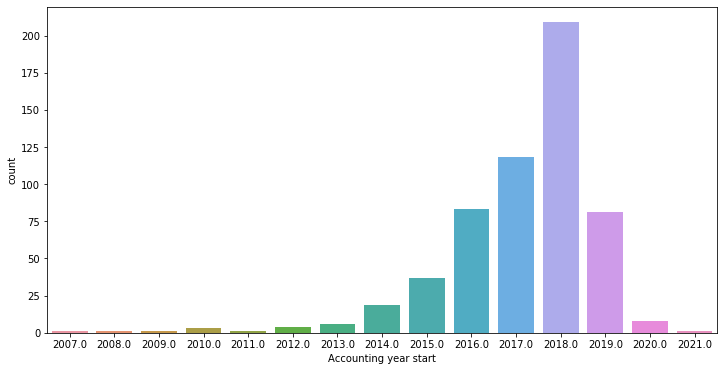

In [166]:
# distribution of 'Accounting year start'
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x = data['Accounting year start'].dt.year)

In [177]:
# For which period of time are emissions given ?
(data['Accounting year end'] - data['Accounting year start']).value_counts()

364 days     451
365 days     107
366 days       7
363 days       2
361 days       1
362 days       1
1095 days      1
729 days       1
211 days       1
dtype: int64

## Gazes included

In [188]:
data['Gases Included'].value_counts()

CH4, CO2, N20                          377
CO2                                     70
CH4, CO2, HFCs, N20, NF3, PFCs, SF6     53
CH4, CO2, HFCs, N20, PFCs, SF6          26
CH4, CO2                                15
CH4, CO2, HFCs, N20                     11
CH4, CO2, HFCs, N20, PFCs                6
CH4, CO2, N20, NF3, SF6                  4
CH4, CO2, HFCs, N20, SF6                 4
CH4, CO2, N20, SF6                       3
CO2, N20                                 2
CO2, HFCs, N20, PFCs, SF6                1
CH4, CO2, HFCs, NF3, PFCs, SF6           1
CH4, CO2, HFCs                           1
CO2, HFCs, N20, NF3, PFCs, SF6           1
CH4, CO2, SF6                            1
Name: Gases Included, dtype: int64

In [191]:
s = ''
for col in data.columns :
    s += '| ' + str(col) + ' |  |\n' 

In [193]:
print(s)

| Year Reported to CDP |  |
| Account Number |  |
| Organization |  |
| City |  |
| Country |  |
| CDP Region |  |
| Access |  |
| City-wide emissions inventory |  |
| Accounting year |  |
| Administrative city boundary |  |
| Inventory boundary (compared to Administrative city boundary) |  |
| Primary Protocol |  |
| Primary Protocol Comment |  |
| Common Reporting Framework inventory format (GPC) |  |
| Gases Included |  |
| Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy |  |
| Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy) |  |
| Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total generation of grid supplied energy |  |
| Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total Emissions (excluding generation of grid-supplied energy) |  |
| Emissions occurring outside city boundary (metric tonnes CO2e) for Total Generation of grid sup

In [197]:
(data['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy'] + data['Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)']) == data['TOTAL Scope 1 Emissions (metric tonnes CO2e)']

0      False
1      False
2      False
3      False
4      False
       ...  
771    False
772    False
773    False
774    False
775    False
Length: 776, dtype: bool

In [200]:
data[data['City'] == 'Malmö']

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Access,City-wide emissions inventory,Accounting year,Administrative city boundary,...,TOTAL BASIC+ Emissions (GPC),Change in emissions,Primary reason for the change in emissions,Land area (in square km),Population,Population Year,City Location,Last update,Accounting year start,Accounting year end
544,2020,43940,Malmö Stad,Malmö,Sweden,Europe,public,Yes,2019-01-01 - 2019-12-31,City / Municipality,...,NaN,Increased,"Other, please specify: Increase in use of dome...",156.6,344166.0,2019,POINT (13.0038 55.605),2021-04-10T02:18:55.717,2019-01-01,2019-12-31


Whats next ?
- combine with previous years
- analylize GHB emissions data
- make json